###  사전 준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정 / 차트 마이너스 깨짐 현상 해결 / seaborn 화면 설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터

#### 데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
train_scaled = train_input / 255.0 # 0 ~ 1 사이 실수값으로 변경

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
train_input.shape

(60000, 28, 28)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [10]:
# 함수 사용 예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [11]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5335 - accuracy: 0.8124 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3913 - accuracy: 0.8593 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3539 - accuracy: 0.8718 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3327 - accuracy: 0.8799 - 2s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3198 - accuracy: 0.8851 - 2s/epoch - 1ms/step


In [13]:
history.history

{'loss': [0.5334694981575012,
  0.3912830352783203,
  0.3538772761821747,
  0.3327355682849884,
  0.31980034708976746],
 'accuracy': [0.812416672706604,
  0.8592708110809326,
  0.871833324432373,
  0.879895806312561,
  0.8851249814033508]}

#### 손실곡선 차트

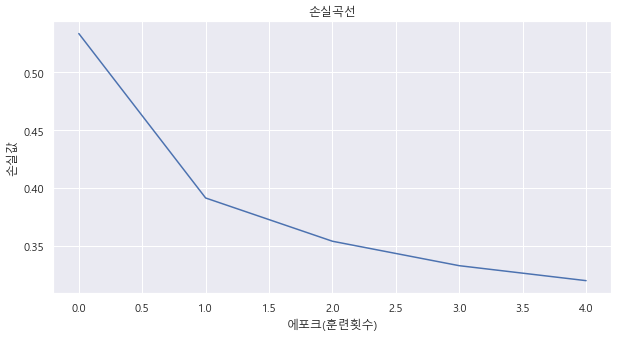

In [14]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

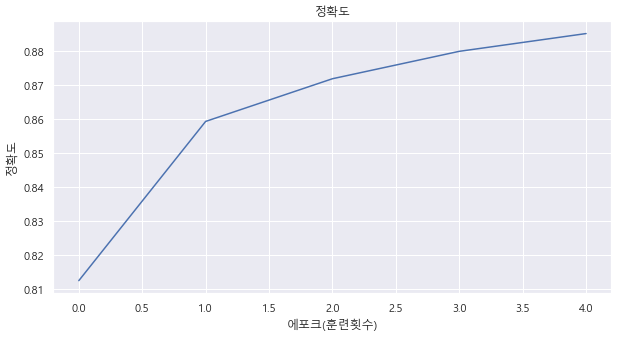

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번으로 훈련

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5360 - accuracy: 0.8118
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3947 - accuracy: 0.8579
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3580 - accuracy: 0.8698
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3361 - accuracy: 0.8791
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.8846
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3082 - accuracy: 0.8908
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2979 - accuracy: 0.8939
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2905 - accuracy: 0.8969
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2849 - accuracy: 0.8996
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.277

In [17]:
history.history

{'loss': [0.5360310673713684,
  0.39474108815193176,
  0.35797274112701416,
  0.33609211444854736,
  0.3198378384113312,
  0.3082367777824402,
  0.29793232679367065,
  0.29054415225982666,
  0.2849072813987732,
  0.27763697504997253,
  0.2694735527038574,
  0.26436784863471985,
  0.26011133193969727,
  0.25569769740104675,
  0.24932488799095154,
  0.24980367720127106,
  0.24397195875644684,
  0.23733150959014893,
  0.23690572381019592,
  0.2310258448123932],
 'accuracy': [0.8117916584014893,
  0.8579166531562805,
  0.8698333501815796,
  0.8791041374206543,
  0.8845624923706055,
  0.89083331823349,
  0.893916666507721,
  0.8968541622161865,
  0.8996041417121887,
  0.903208315372467,
  0.9054583311080933,
  0.9068958163261414,
  0.9104375243186951,
  0.9106041789054871,
  0.9129166603088379,
  0.9140416383743286,
  0.9167291522026062,
  0.9198333621025085,
  0.9200208187103271,
  0.921583354473114]}

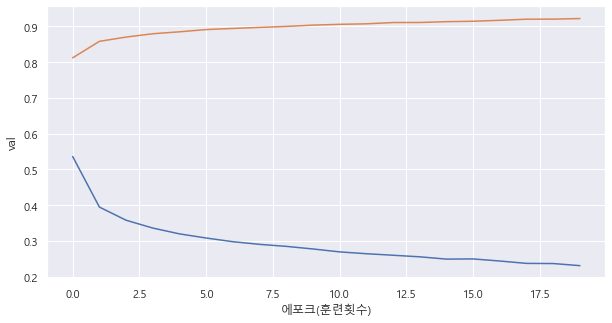

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5287 - accuracy: 0.8147 - val_loss: 0.4513 - val_accuracy: 0.8428
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.8585 - val_loss: 0.4060 - val_accuracy: 0.8579
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8735 - val_loss: 0.3907 - val_accuracy: 0.8648
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8803 - val_loss: 0.3653 - val_accuracy: 0.8756
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3211 - accuracy: 0.8864 - val_loss: 0.4040 - val_accuracy: 0.8688
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8902 - val_loss: 0.3731 - val_accuracy: 0.8690
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.8956 - val_loss: 0.3831 - val_accuracy:

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

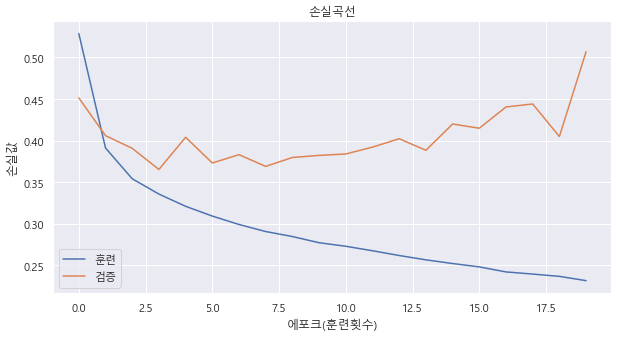

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5896 - accuracy: 0.7935 - val_loss: 0.4146 - val_accuracy: 0.8496
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4456 - accuracy: 0.8431 - val_loss: 0.3994 - val_accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4193 - accuracy: 0.8539 - val_loss: 0.3867 - val_accuracy: 0.8662
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4051 - accuracy: 0.8597 - val_loss: 0.3906 - val_accuracy: 0.8633
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4023 - accuracy: 0.8628 - val_loss: 0.3930 - val_accuracy: 0.8659
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3934 - accuracy: 0.8674 - val_loss: 0.4247 - val_accuracy: 0.8655
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3911 - accuracy: 0.8684 - val_loss: 0.4027 - val_accuracy:

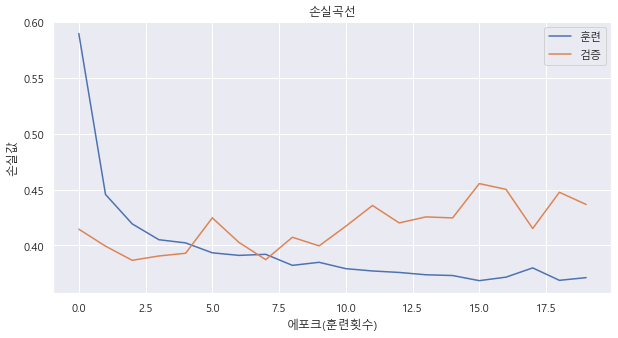

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8762 - val_loss: 0.4155 - val_accuracy: 0.8700
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3524 - accuracy: 0.8739 - val_loss: 0.3904 - val_accuracy: 0.8729
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3397 - accuracy: 0.8775 - val_loss: 0.4005 - val_accuracy: 0.8743
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8822 - val_loss: 0.3932 - val_accuracy: 0.8739
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3197 - accuracy: 0.8811 - val_loss: 0.3762 - val_accuracy: 0.8779
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3135 - accuracy: 0.8838 - val_loss: 0.3854 - val_accuracy: 0.8784
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8851 - val_loss: 0.3973 - val_accuracy:

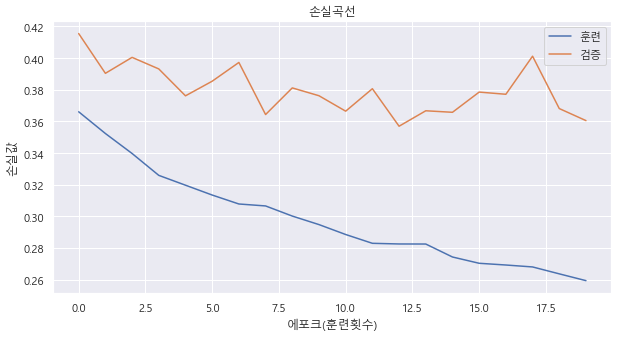

In [26]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 모델 다시 생성

In [27]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel_re')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [28]:
model_2 = model_fn()
model_2.summary()

Model: "model_fn_MakeModel_re"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2 = model_fn(keras.layers.Dropout(0.3))
model_2.summary()

Model: "model_fn_MakeModel_re"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model_2.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5995 - accuracy: 0.7904 - val_loss: 0.4344 - val_accuracy: 0.8427
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4371 - accuracy: 0.8417 - val_loss: 0.3869 - val_accuracy: 0.8602
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4002 - accuracy: 0.8558 - val_loss: 0.3612 - val_accuracy: 0.8672
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8606 - val_loss: 0.3595 - val_accuracy: 0.8681
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3644 - accuracy: 0.8639 - val_loss: 0.3424 - val_accuracy: 0.8777
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8709 - val_loss: 0.3457 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8757 - val_loss: 0.3456 - val_accuracy:

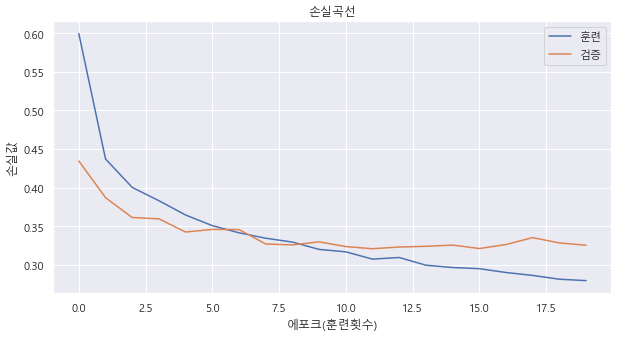

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 모델 저장/로드

In [32]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [34]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

##### 가중치 모델 로드

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

model.evaluate(val_scaled, val_target)

##### 전체 모델 로드

In [36]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8874


[0.3605146110057831, 0.887416660785675]

가중치만 저장하면 모델 기능 제약있음. 훈련된 모델 데이터 전체를 저장하면 모든 기능 수행


In [37]:
model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


array([[2.8665187e-27, 0.0000000e+00, 7.4112362e-32, ..., 2.1904249e-23,
        1.0000000e+00, 7.1915445e-34],
       [2.6883221e-17, 0.0000000e+00, 3.9553304e-24, ..., 3.7495819e-29,
        1.0000000e+00, 2.8955454e-26],
       [1.5056034e-32, 1.3511627e-35, 1.9689707e-34, ..., 9.9999988e-01,
        2.7301450e-18, 1.2900806e-20],
       ...,
       [4.2310801e-11, 0.0000000e+00, 4.4167388e-14, ..., 8.1024021e-20,
        1.0000000e+00, 3.7918324e-19],
       [3.9536547e-17, 0.0000000e+00, 6.9244216e-23, ..., 5.5069108e-25,
        1.0000000e+00, 6.5376946e-26],
       [7.3663421e-02, 6.6830702e-10, 2.1530049e-02, ..., 4.4752210e-06,
        3.0104854e-07, 5.2025411e-05]], dtype=float32)

In [38]:
# 예측 결과
val_lavels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_lavels == val_target)

375/375 [==============================] - 0s 906us/step


0.8874166666666666

In [39]:
val_lavels.shape

(12000,)

In [40]:
val_lavels

array([8, 8, 7, ..., 8, 8, 6], dtype=int64)

#### 콜백 callback

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5894 - accuracy: 0.7926 - val_loss: 0.4327 - val_accuracy: 0.8473
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.8426 - val_loss: 0.3815 - val_accuracy: 0.8578
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4024 - accuracy: 0.8537 - val_loss: 0.3683 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8609 - val_loss: 0.3659 - val_accuracy: 0.8670
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8636 - val_loss: 0.3525 - val_accuracy: 0.8698
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8697 - val_loss: 0.3622 - val_accuracy: 0.8690
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8734 - val_loss: 0.3405 - val_accuracy:

In [42]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8867


[0.3194035589694977, 0.8867499828338623]

#### 조기종료

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model_2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1463/1500 [============================>.] - ETA: 0s - loss: 0.5880 - accuracy: 0.7943
Epoch 1: val_loss improved from inf to 0.41718, saving model to ./data\best_model_2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5860 - accuracy: 0.7949 - val_loss: 0.4172 - val_accuracy: 0.8489
Epoch 2/20
1491/1500 [============================>.] - ETA: 0s - loss: 0.4395 - accuracy: 0.8425
Epoch 2: val_loss improved from 0.41718 to 0.38394, saving model to ./data\best_model_2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.8426 - val_loss: 0.3839 - val_accuracy: 0.8578
Epoch 3/20
1488/1500 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8529
Epoch 3: val_loss improved from 0.38394 to 0.37119, saving model to ./data\best_model_2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4055 - accuracy: 0.8531 - val_loss: 0.3712 - val_accuracy: 0.8629
Epoch 4/20
1485/1500 [================

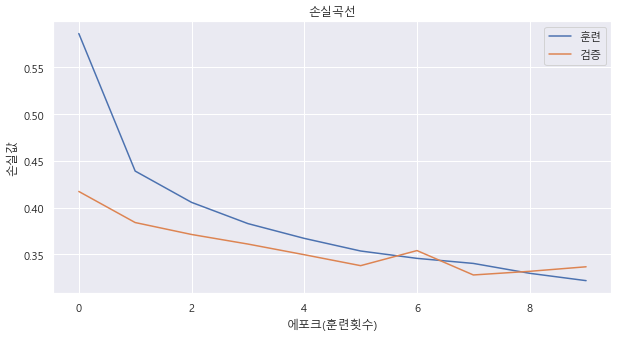

In [44]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [45]:
# 어느 에포크에서 조기종료 했는지 확인
early_stopping_cb.stopped_epoch 
# 9번째에서 멈춤(값이 계속 바뀜 why? dropout하는 값이 계속 바뀌기 때문)

9

In [46]:
model.evaluate(val_scaled, val_target) # 8번째 값 저장

375/375 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8813


[0.327883780002594, 0.8812500238418579]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장 값 비교

In [47]:
model_cp = keras.models.load_model('./data/best_model_2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3279 - accuracy: 0.8813


[0.327883780002594, 0.8812500238418579]

In [51]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.88125

In [52]:
# 예측결과
model.predict(val_scaled[:5])

1/1 [==============================] - 0s 17ms/step


array([[2.3735607e-09, 1.9359643e-14, 4.8579047e-11, 5.3632259e-12,
        1.5409940e-10, 1.0342372e-06, 6.2215697e-12, 3.0617571e-07,
        9.9999869e-01, 1.6506058e-09],
       [6.3817134e-07, 1.4277803e-13, 6.1078616e-08, 2.0967956e-12,
        4.6031250e-09, 1.0851597e-07, 2.3204778e-07, 2.0989797e-09,
        9.9999893e-01, 3.9510789e-10],
       [2.1501727e-11, 2.3232830e-10, 3.3565221e-13, 3.8170758e-11,
        2.1656048e-13, 6.5373885e-04, 1.9944788e-12, 9.9929953e-01,
        1.3983164e-08, 4.6710255e-05],
       [3.0835010e-03, 1.8336497e-04, 2.3649561e-01, 1.6413977e-03,
        6.3871980e-01, 8.4625453e-06, 1.1739368e-01, 4.8297032e-05,
        2.2543040e-03, 1.7157863e-04],
       [8.7517675e-12, 4.9861214e-16, 2.6773227e-15, 3.7245343e-14,
        5.4010144e-14, 5.7703033e-09, 1.2276214e-14, 1.0031885e-07,
        9.9999988e-01, 5.0857718e-09]], dtype=float32)